## Categorical Variables and One Hot Encoding

İki tür kategorik veri bulunmaktadır. Bunlar **ordinal** ve **nominal**’dir.
* Nominal veri tipi için Evli/Bakar, Kadın/Erkek örnek verilebilir. Nominal değişken içinde yer alan değerlerin birbirinden üstün olma gibi bir durumu söz konusu değildir. Dolayısı ile aralarında bir sıralama olamaz.
* Ordinal veri tipinde ise bir üstünlükten bahsedilebilir. Bu tarz değişkenlerde sıralanabilirlik söz konusudur. Ordinal veri tipine ‘az gelişmiş’, ‘gelişmekte olan’, ‘gelişmiş’ gibi ülke gelişmişlik düzeyi örnek gösterilebilir

Makine öğrenmesi modeli kurulurken örneğin 3 farklı grup için 3 dummy (kukla) değişken oluşturulur ancak bu kolonlardan bir tanesi silinir (K - 1). Bu işlemin yapılmasındaki amaç **Multicollinearity** yani **çoklu bağlanım** sorununu ortadan kaldırmaktır. 

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r"C:/Users/sahik/Documents/MAKINE_OGRENMESI/DATA/home_prices2.csv")
df

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In [3]:
dummies = pd.get_dummies(df.town)
dummies

,monroe township,robinsville,west windsor
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,0,1,0


In [4]:
merged = pd.concat([df, dummies], axis=1)
merged

,town,area,price,monroe township,robinsville,west windsor
0,monroe township,2600,550000,1,0,0
1,monroe township,3000,565000,1,0,0
2,monroe township,3200,610000,1,0,0
3,monroe township,3600,680000,1,0,0
4,monroe township,4000,725000,1,0,0
5,west windsor,2600,585000,0,0,1
6,west windsor,2800,615000,0,0,1
7,west windsor,3300,650000,0,0,1
8,west windsor,3600,710000,0,0,1
9,robinsville,2600,575000,0,1,0


## Dummy Variable Trap

In [5]:
final = merged.drop(["town", "west windsor"], axis=1)
final

,area,price,monroe township,robinsville
0,2600,550000,1,0
1,3000,565000,1,0
2,3200,610000,1,0
3,3600,680000,1,0
4,4000,725000,1,0
5,2600,585000,0,0
6,2800,615000,0,0
7,3300,650000,0,0
8,3600,710000,0,0
9,2600,575000,0,1


In [6]:
X = final.drop("price", axis=1)
X

,area,monroe township,robinsville
0,2600,1,0
1,3000,1,0
2,3200,1,0
3,3600,1,0
4,4000,1,0
5,2600,0,0
6,2800,0,0
7,3300,0,0
8,3600,0,0
9,2600,0,1


In [7]:
y = final.price
y

0     550000
1     565000
2     610000
3     680000
4     725000
5     585000
6     615000
7     650000
8     710000
9     575000
10    600000
11    620000
12    695000
Name: price, dtype: int64

In [8]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [9]:
model.predict([[2800,0,1]])

array([590775.63964739])

In [10]:
model.predict([[3400,0,0]])

array([681241.66845839])

In [11]:
model.predict(X)

array([539709.7398409 , 590468.71640508, 615848.20468716, 666607.18125134,
       717366.15781551, 579723.71533005, 605103.20361213, 668551.92431735,
       706621.15674048, 565396.15136531, 603465.38378844, 628844.87207052,
       692293.59277574])

In [12]:
model.score(X,y)

0.9573929037221873

## Using sklearn OneHotEncoder

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [14]:
dfle = df
dfle.town = le.fit_transform(dfle.town)
dfle

,town,area,price
0,0,2600,550000
1,0,3000,565000
2,0,3200,610000
3,0,3600,680000
4,0,4000,725000
5,2,2600,585000
6,2,2800,615000
7,2,3300,650000
8,2,3600,710000
9,1,2600,575000


In [15]:
X = dfle[["town","area"]].values
X

array([[   0, 2600],
       [   0, 3000],
       [   0, 3200],
       [   0, 3600],
       [   0, 4000],
       [   2, 2600],
       [   2, 2800],
       [   2, 3300],
       [   2, 3600],
       [   1, 2600],
       [   1, 2900],
       [   1, 3100],
       [   1, 3600]], dtype=int64)

In [16]:
y = dfle.price.values
y

array([550000, 565000, 610000, 680000, 725000, 585000, 615000, 650000,
       710000, 575000, 600000, 620000, 695000], dtype=int64)

In [17]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([("town", OneHotEncoder(), [0])], remainder="passthrough")

In [18]:
X = ct.fit_transform(X)
X

array([[1.0e+00, 0.0e+00, 0.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.0e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.2e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.6e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 4.0e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 2.6e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 2.8e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 3.3e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 3.6e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 2.6e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 2.9e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 3.1e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 3.6e+03]])

In [19]:
X = X[:,1:]
X

array([[0.0e+00, 0.0e+00, 2.6e+03],
       [0.0e+00, 0.0e+00, 3.0e+03],
       [0.0e+00, 0.0e+00, 3.2e+03],
       [0.0e+00, 0.0e+00, 3.6e+03],
       [0.0e+00, 0.0e+00, 4.0e+03],
       [0.0e+00, 1.0e+00, 2.6e+03],
       [0.0e+00, 1.0e+00, 2.8e+03],
       [0.0e+00, 1.0e+00, 3.3e+03],
       [0.0e+00, 1.0e+00, 3.6e+03],
       [1.0e+00, 0.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 2.9e+03],
       [1.0e+00, 0.0e+00, 3.1e+03],
       [1.0e+00, 0.0e+00, 3.6e+03]])

In [20]:
model.fit(X,y)

LinearRegression()

In [21]:
model.predict([[0,1,3400]])

array([681241.6684584])

In [22]:
model.predict([[1,0,2800]])

array([590775.63964739])

## ÖDEV:

In [23]:
data = pd.read_csv(r"C:/Users/sahik/Documents/MAKINE_OGRENMESI/DATA/car_prices.csv")
data

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [24]:
import matplotlib.pyplot as plt

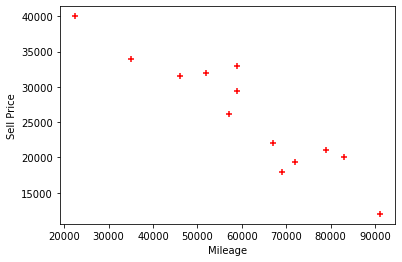

In [25]:
%matplotlib inline
plt.xlabel("Mileage")
plt.ylabel("Sell Price")
plt.scatter(data.Mileage, data["Sell Price($)"], marker = "+", color = "red")

In [26]:
xx = data.Mileage
yy = data["Sell Price($)"]
l = LinearRegression()
l.fit([xx],[yy])

LinearRegression()

ValueError: x and y must have same first dimension, but have shapes (13,) and (1, 13)

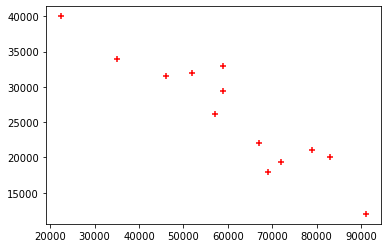

In [27]:
## sanırım reshape etmen gerekiyor babba
plt.scatter(xx, yy, marker = "+" , c = "red")
plt.plot(xx, l.predict([xx]), c = "blue")

### pandas.get_dummy

In [35]:
data = pd.get_dummies(data)
data

,Mileage,Sell Price($),Age(yrs),Car Model_Audi A5,Car Model_BMW X5,Car Model_Mercedez Benz C class
0,69000,18000,6,0,1,0
1,35000,34000,3,0,1,0
2,57000,26100,5,0,1,0
3,22500,40000,2,0,1,0
4,46000,31500,4,0,1,0
5,59000,29400,5,1,0,0
6,52000,32000,5,1,0,0
7,72000,19300,6,1,0,0
8,91000,12000,8,1,0,0
9,67000,22000,6,0,0,1


In [38]:
data = data.drop("Car Model_Mercedez Benz C class", axis=1)
data

,Mileage,Sell Price($),Age(yrs),Car Model_Audi A5,Car Model_BMW X5
2,57000,26100,5,0,1
3,22500,40000,2,0,1
4,46000,31500,4,0,1
5,59000,29400,5,1,0
6,52000,32000,5,1,0
7,72000,19300,6,1,0
8,91000,12000,8,1,0
9,67000,22000,6,0,0
10,83000,20000,7,0,0
11,79000,21000,7,0,0


In [39]:
X = data.drop("Sell Price($)", axis=1)
X

,Mileage,Age(yrs),Car Model_Audi A5,Car Model_BMW X5
2,57000,5,0,1
3,22500,2,0,1
4,46000,4,0,1
5,59000,5,1,0
6,52000,5,1,0
7,72000,6,1,0
8,91000,8,1,0
9,67000,6,0,0
10,83000,7,0,0
11,79000,7,0,0


In [40]:
y = data["Sell Price($)"]
y

2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Sell Price($), dtype: int64

In [41]:
from sklearn.linear_model import LinearRegression
lireg = LinearRegression()
lireg.fit(X,y)

LinearRegression()

In [53]:
lireg.score(X,y)

0.9355973866071033

In [54]:
lireg.predict([[45000,4,0,0]])

array([36840.43617668])

In [55]:
lireg.predict([[86000,7,0,1]])

array([12058.54663055])